## Equitable Sharing Program - Analysis

  The United States Department of Justice, in early 2016, reinstated a system of practices known as the Equitable Sharing Program (ESP). The ESP, under Federal law, empowers a variety of law enforcement agencies to retain a large portion of assets seized from people. It enables these agencies the ability to prosecute some asset forfeiture cases under Federal law, which is quite favorable to these agencies and statistically has allowed for 80% of seized assets to be kept by the agencies, rather than state law. 

  The raw dataset that we will clean and analyze offers insight into the historical spending and practices regarding asset seizure by law enforcement agencies. This data was obtained from a Freedom of Information Act (FOIA) request fulfilled in December 2014. *The Washington Post* referenced and utilized this data in their reporting of the 2016 changes to the ESP.
  
  The article detailing this event is available [here](https://www.washingtonpost.com/news/wonk/wp/2016/03/28/the-feds-have-resumed-a-controversial-program-that-lets-cops-take-stuff-and-keep-it/) and the data regarding the Equitable Sharing Program was originally found on [Kaggle](https://www.kaggle.com/washingtonpost/equitable-sharing-spending-dataset) and also further detailed on the Washington Post's [GitHub](https://github.com/washingtonpost/data-equitable-sharing-spending) account.

#### Focus Areas for Analysis

A. Which agency types and individual agencies have the greatest number of ESP submissions?

B. Identify the states with the greatest volume of ESP submissions and as well as agencies who have recieved non-cash assets.

C. How many agencies received non-cash assets from the federal government through Equitable Sharing?

D. How many agencies have undergone legal proceedings due to a discrimination allegation?

E. Are there any trends in the total equitable sharing fund across agencies by year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Equitable Sharing Program main spending dataset and the notes file detailing the variables
esp = pd.read_csv(r"C:\Users\esait\OneDrive\Data Analyst - Portfolio\Datasets\Equitable Sharing - WashPo\ESP dataset.csv")
esp_notes = pd.read_csv(r"C:\Users\esait\OneDrive\Data Analyst - Portfolio\Datasets\Equitable Sharing - WashPo\notes.csv")

In [3]:
esp_notes.shape

(58, 3)

In [4]:
esp_notes.head(15)

,table,field name,description
0,spending_master,AGENCYNAME,Name of Agency
1,spending_master,AGENCYTYPE,"NG = National Guard Counterdrug Unit, OT = Oth..."
2,spending_master,CERTIFICATIONID,Unique identifier attached to each form
3,spending_master,CURRENTFYBUDGET,Budget during reported fiscal year
4,spending_master,DISCRIM,Tells whether during the past fiscal year the ...
5,spending_master,FYENDDATE,End of agencies fiscal year
6,spending_master,GOVBODYHEADNAME,Name of person from agency governing police (i...
7,spending_master,GOVBODYHEADTITLE,Title of person from agency governing police (...
8,spending_master,J_TOTAL,Total Justice Department funds spent or transf...
9,spending_master,JUSTICE_A,Total Justice Department funds spent on salari...


In [5]:
list(esp_notes['field name'])

['AGENCYNAME',
 'AGENCYTYPE',
 'CERTIFICATIONID',
 'CURRENTFYBUDGET',
 'DISCRIM',
 'FYENDDATE',
 'GOVBODYHEADNAME',
 'GOVBODYHEADTITLE',
 'J_TOTAL',
 'JUSTICE_A',
 'JUSTICE_B',
 'JUSTICE_C',
 'JUSTICE_D',
 'JUSTICE_E',
 'JUSTICE_F',
 'JUSTICE_G',
 'JUSTICE_H',
 'JUSTICE_I',
 'JUSTICE_J',
 'JUSTICE_K',
 'JUSTICE_L',
 'JUSTICE_M',
 'LAWENFHEADNAME',
 'LAWENFHEADTITLE',
 'LINE1J',
 'LINE1T',
 'LINE2J',
 'LINE2T',
 'LINE3J',
 'LINE3T',
 'LINE4J',
 'LINE4T',
 'LINE5J',
 'LINE5T',
 'LINE6J',
 'LINE6T',
 'LINE7J',
 'LINE7T',
 'LINE8J',
 'LINE8T',
 'NCIC',
 'NONCASHASSETS',
 'PARTICIPANT',
 'STATE',
 'T_TOTAL',
 'TREASURY_A',
 'TREASURY_B',
 'TREASURY_C',
 'TREASURY_D',
 'TREASURY_E',
 'TREASURY_F',
 'TREASURY_G',
 'TREASURY_H',
 'TREASURY_I',
 'TREASURY_J',
 'TREASURY_L',
 'TREASURY_M',
 'VERSION']

In [6]:
list(esp_notes.description)

['Name of Agency',
 "NG = National Guard Counterdrug Unit, OT = Other, PD = Police Department, PO = Prosecutor's Office, SO = Sheriff's Office, TF = Task Force",
 'Unique identifier attached to each form',
 'Budget during reported fiscal year',
 'Tells whether during the past fiscal year the Agency been part of any proceedings alleging discrimination by the Agency',
 'End of agencies fiscal year',
 'Name of person from agency governing police (i.e. Mayor, Governor) who signed off on form',
 'Title of person from agency governing police (i.e. Mayor, Governor) who signed off on form',
 'Total Justice Department funds spent or transferred',
 'Total Justice Department funds spent on salaries for new, temporary, not to exceed 1-year employees',
 'Total Justice Department funds spent on overtime',
 'Total Justice Department funds spent on informants, "buy money" and rewards',
 'Total Justice Department funds spent on travel and training',
 'Total Justice Department funds spent on communicati

In [7]:
esp.head()

,AGENCYTYPE,AGENCYNAME,NCIC,STATE,FYENDDATE,CURRENTFYBUDGET,PARTICIPANT,LINE1J,LINE1T,LINE2J,...,J_TOTAL,T_TOTAL,NONCASHASSETS,DISCRIM,LAWENFHEADNAME,LAWENFHEADTITLE,GOVBODYHEADNAME,GOVBODYHEADTITLE,VERSION,CERTIFICATIONID
0,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2009,2646000.0,EXIST,NaN,NaN,9203.0,...,0,0,NaN,N,MIKE HALL,DIRECTOR,R. STEVEN BEBB,DISTRICT ATTORNEY GENERAL,1.7,112191
1,TF,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2008,1000000.0,EXIST,NaN,NaN,NaN,...,0,0,NaN,N,MIKE HALL,DIRECTOR,STEVEN R BEBB,DISTRICT ATTORNEY GENERAL,1.7,102965
2,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2012,1309800.0,EXIST,4525.0,NaN,NaN,...,0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2,136713
3,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2011,1700000.0,EXIST,547.0,NaN,3978.0,...,0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,1.9,126215
4,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2014,1000000.0,AMEND,4525.0,NaN,31992.0,...,0,0,N,N,Steve Lawson,Director,Stephen D Crump,District Attorney General,2.1,158733


In [8]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45840 entries, 0 to 45839
Data columns (total 58 columns):
AGENCYTYPE          45837 non-null object
AGENCYNAME          45840 non-null object
NCIC                45840 non-null object
STATE               45840 non-null object
FYENDDATE           45840 non-null object
CURRENTFYBUDGET     45429 non-null float64
PARTICIPANT         45633 non-null object
LINE1J              34473 non-null float64
LINE1T              15142 non-null float64
LINE2J              26590 non-null float64
LINE2T              12507 non-null float64
LINE3J              4466 non-null float64
LINE3T              1878 non-null float64
LINE4J              12933 non-null float64
LINE4T              8203 non-null float64
LINE5J              24653 non-null float64
LINE5T              11480 non-null float64
LINE6J              45722 non-null float64
LINE6T              45564 non-null float64
LINE7J              45684 non-null float64
LINE7T              45570 non-null float

In [9]:
esp.shape

(45840, 58)

In [10]:
esp.isnull().sum()

AGENCYTYPE              3
AGENCYNAME              0
NCIC                    0
STATE                   0
FYENDDATE               0
CURRENTFYBUDGET       411
PARTICIPANT           207
LINE1J              11367
LINE1T              30698
LINE2J              19250
LINE2T              33333
LINE3J              41374
LINE3T              43962
LINE4J              32907
LINE4T              37637
LINE5J              21187
LINE5T              34360
LINE6J                118
LINE6T                276
LINE7J                156
LINE7T                270
LINE8J                130
LINE8T                273
JUSTICE_A           35906
TREASURY_A          38342
JUSTICE_B           34991
TREASURY_B          38183
JUSTICE_C           33094
TREASURY_C          38104
JUSTICE_D           30106
TREASURY_D          37352
JUSTICE_E           27921
TREASURY_E          36747
JUSTICE_F           24216
TREASURY_F          29590
JUSTICE_G           31943
TREASURY_G          37845
JUSTICE_H           33226
TREASURY_H  

In [11]:
esp.drop_duplicates()

,AGENCYTYPE,AGENCYNAME,NCIC,STATE,FYENDDATE,CURRENTFYBUDGET,PARTICIPANT,LINE1J,LINE1T,LINE2J,...,J_TOTAL,T_TOTAL,NONCASHASSETS,DISCRIM,LAWENFHEADNAME,LAWENFHEADTITLE,GOVBODYHEADNAME,GOVBODYHEADTITLE,VERSION,CERTIFICATIONID
0,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2009,2646000.0,EXIST,NaN,NaN,9203.0,...,0,0,NaN,N,MIKE HALL,DIRECTOR,R. STEVEN BEBB,DISTRICT ATTORNEY GENERAL,1.7,112191
1,TF,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2008,1000000.0,EXIST,NaN,NaN,NaN,...,0,0,NaN,N,MIKE HALL,DIRECTOR,STEVEN R BEBB,DISTRICT ATTORNEY GENERAL,1.7,102965
2,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2012,1309800.0,EXIST,4525.0,NaN,NaN,...,0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2,136713
3,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2011,1700000.0,EXIST,547.0,NaN,3978.0,...,0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,1.9,126215
4,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2014,1000000.0,AMEND,4525.0,NaN,31992.0,...,0,0,N,N,Steve Lawson,Director,Stephen D Crump,District Attorney General,2.1,158733
5,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2013,1000000.0,EXIST,4525.0,NaN,NaN,...,0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2.1,147533
6,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2010,2646000.0,EXIST,NaN,NaN,547.0,...,0,0,N,N,MIKE HALL,DIRECTOR,R. STEVEN BEBB,DISTRICT ATTORNEY GENERAL,1.8,117140
7,TF,11th Judicial Dist. Drug Task Force,OK074015A,OK,6/30/2008,0.0,EXIST,0.0,0.0,0.0,...,0,0,NaN,N,Rick Silver,Drug Task Force Coordinator,Frederick Esser,Washington CountyDistrict Atty,NaN,97463
8,PO,"11th Judicial District, District Attorney",CO008015A,CO,12/31/2008,1802673.0,EXIST,NaN,NaN,NaN,...,0,0,NaN,N,Thom K. LeDoux,District Attorney,"Mike Stiehl, Chairperson",Fremont Co. Bd. of Commissione,1.5,102321
9,PO,"11th Judicial District, District Attorney",CO008015A,CO,12/31/2012,2112141.0,EXIST,NaN,NaN,NaN,...,0,0,N,N,Thom K. LeDoux,"District Attorney, 11th JD","Debbie Bell, Chairperson",Fremont County Commissioner,2.1,145412


In [12]:
esp = esp.drop(['JUSTICE_A',
 'JUSTICE_B',
 'JUSTICE_C',
 'JUSTICE_D',
 'JUSTICE_E',
 'JUSTICE_F',
 'JUSTICE_G',
 'JUSTICE_H',
 'JUSTICE_I',
 'JUSTICE_J',
 'JUSTICE_K',
 'JUSTICE_L',
 'JUSTICE_M',
 'TREASURY_A',
 'TREASURY_B',
 'TREASURY_C',
 'TREASURY_D',
 'TREASURY_E',
 'TREASURY_F',
 'TREASURY_G',
 'TREASURY_H',
 'TREASURY_I',
 'TREASURY_J',
 'TREASURY_L',
 'TREASURY_M',
 'LINE1J',
 'LINE1T',
 'LINE2J',
 'LINE2T',
 'LINE3J',
 'LINE3T',
 'LINE4J',
 'LINE4T',
 'LINE5J',
 'LINE5T',
 'T_TOTAL'], axis=1)

In [13]:
list(esp.columns)

['AGENCYTYPE',
 'AGENCYNAME',
 'NCIC',
 'STATE',
 'FYENDDATE',
 'CURRENTFYBUDGET',
 'PARTICIPANT',
 'LINE6J',
 'LINE6T',
 'LINE7J',
 'LINE7T',
 'LINE8J',
 'LINE8T',
 'J_TOTAL',
 'NONCASHASSETS',
 'DISCRIM',
 'LAWENFHEADNAME',
 'LAWENFHEADTITLE',
 'GOVBODYHEADNAME',
 'GOVBODYHEADTITLE',
 'VERSION',
 'CERTIFICATIONID']

In [14]:
# Rename columns to align with field name descriptions in the Notes file
esp = esp.rename(columns={"LINE6J": "TOTAL ESF, JUSTICE", "LINE6T": "TOTAL ESF, TREASURY", "LINE7J": "FED SHARING FUNDS SPENT, JUSTICE", "LINE7T": "FED SHARING FUNDS SPENT, TREASURY",  "LINE8J": "ENDING BALANCE, JUSTICE", "LINE8T": "ENDING BALANCE, TREASURY", "J_TOTAL": "TOTAL JUSTICE FUNDS SPENT/TRANSFER"})
esp.head()

,AGENCYTYPE,AGENCYNAME,NCIC,STATE,FYENDDATE,CURRENTFYBUDGET,PARTICIPANT,"TOTAL ESF, JUSTICE","TOTAL ESF, TREASURY","FED SHARING FUNDS SPENT, JUSTICE",...,"ENDING BALANCE, TREASURY",TOTAL JUSTICE FUNDS SPENT/TRANSFER,NONCASHASSETS,DISCRIM,LAWENFHEADNAME,LAWENFHEADTITLE,GOVBODYHEADNAME,GOVBODYHEADTITLE,VERSION,CERTIFICATIONID
0,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2009,2646000.0,EXIST,9203.0,0.0,0.0,...,0.0,0,NaN,N,MIKE HALL,DIRECTOR,R. STEVEN BEBB,DISTRICT ATTORNEY GENERAL,1.7,112191
1,TF,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2008,1000000.0,EXIST,0.0,0.0,0.0,...,0.0,0,NaN,N,MIKE HALL,DIRECTOR,STEVEN R BEBB,DISTRICT ATTORNEY GENERAL,1.7,102965
2,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2012,1309800.0,EXIST,4525.0,0.0,0.0,...,0.0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2,136713
3,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2011,1700000.0,EXIST,4525.0,0.0,0.0,...,0.0,0,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,1.9,126215
4,OT,10th Judicial District Drug Task Force,TN0060300,TN,6/30/2014,1000000.0,AMEND,36517.0,374.0,0.0,...,374.0,0,N,N,Steve Lawson,Director,Stephen D Crump,District Attorney General,2.1,158733


In [15]:
# Calculate the number of null values
print(esp.isnull().sum())

AGENCYTYPE                                3
AGENCYNAME                                0
NCIC                                      0
STATE                                     0
FYENDDATE                                 0
CURRENTFYBUDGET                         411
PARTICIPANT                             207
TOTAL ESF, JUSTICE                      118
TOTAL ESF, TREASURY                     276
FED SHARING FUNDS SPENT, JUSTICE        156
FED SHARING FUNDS SPENT, TREASURY       270
ENDING BALANCE, JUSTICE                 130
ENDING BALANCE, TREASURY                273
TOTAL JUSTICE FUNDS SPENT/TRANSFER        0
NONCASHASSETS                         11041
DISCRIM                                 296
LAWENFHEADNAME                            1
LAWENFHEADTITLE                           1
GOVBODYHEADNAME                          26
GOVBODYHEADTITLE                         20
VERSION                                2365
CERTIFICATIONID                           0
dtype: int64


In [16]:
# Remove the rows with missing values
esp = esp.dropna()
esp.count()

AGENCYTYPE                            34767
AGENCYNAME                            34767
NCIC                                  34767
STATE                                 34767
FYENDDATE                             34767
CURRENTFYBUDGET                       34767
PARTICIPANT                           34767
TOTAL ESF, JUSTICE                    34767
TOTAL ESF, TREASURY                   34767
FED SHARING FUNDS SPENT, JUSTICE      34767
FED SHARING FUNDS SPENT, TREASURY     34767
ENDING BALANCE, JUSTICE               34767
ENDING BALANCE, TREASURY              34767
TOTAL JUSTICE FUNDS SPENT/TRANSFER    34767
NONCASHASSETS                         34767
DISCRIM                               34767
LAWENFHEADNAME                        34767
LAWENFHEADTITLE                       34767
GOVBODYHEADNAME                       34767
GOVBODYHEADTITLE                      34767
VERSION                               34767
CERTIFICATIONID                       34767
dtype: int64

In [17]:
# Confirm that there are no more null values in dataset
print(esp.isnull().sum())

AGENCYTYPE                            0
AGENCYNAME                            0
NCIC                                  0
STATE                                 0
FYENDDATE                             0
CURRENTFYBUDGET                       0
PARTICIPANT                           0
TOTAL ESF, JUSTICE                    0
TOTAL ESF, TREASURY                   0
FED SHARING FUNDS SPENT, JUSTICE      0
FED SHARING FUNDS SPENT, TREASURY     0
ENDING BALANCE, JUSTICE               0
ENDING BALANCE, TREASURY              0
TOTAL JUSTICE FUNDS SPENT/TRANSFER    0
NONCASHASSETS                         0
DISCRIM                               0
LAWENFHEADNAME                        0
LAWENFHEADTITLE                       0
GOVBODYHEADNAME                       0
GOVBODYHEADTITLE                      0
VERSION                               0
CERTIFICATIONID                       0
dtype: int64


In [18]:
# Converting the date column into three distinct date columns for future analysis
esp['FYENDDATE'] = pd.to_datetime(esp['FYENDDATE'], infer_datetime_format=True)
esp['YEAR'] = esp.FYENDDATE.apply(lambda x : x.year)
esp['MONTH'] = esp.FYENDDATE.apply(lambda x : x.month)

In [19]:
esp.head()

,AGENCYTYPE,AGENCYNAME,NCIC,STATE,FYENDDATE,CURRENTFYBUDGET,PARTICIPANT,"TOTAL ESF, JUSTICE","TOTAL ESF, TREASURY","FED SHARING FUNDS SPENT, JUSTICE",...,NONCASHASSETS,DISCRIM,LAWENFHEADNAME,LAWENFHEADTITLE,GOVBODYHEADNAME,GOVBODYHEADTITLE,VERSION,CERTIFICATIONID,YEAR,MONTH
2,OT,10th Judicial District Drug Task Force,TN0060300,TN,2012-06-30,1309800.0,EXIST,4525.0,0.0,0.0,...,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2,136713,2012,6
3,OT,10th Judicial District Drug Task Force,TN0060300,TN,2011-06-30,1700000.0,EXIST,4525.0,0.0,0.0,...,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,1.9,126215,2011,6
4,OT,10th Judicial District Drug Task Force,TN0060300,TN,2014-06-30,1000000.0,AMEND,36517.0,374.0,0.0,...,N,N,Steve Lawson,Director,Stephen D Crump,District Attorney General,2.1,158733,2014,6
5,OT,10th Judicial District Drug Task Force,TN0060300,TN,2013-06-30,1000000.0,EXIST,4525.0,0.0,0.0,...,N,N,Steve Lawson,Director,Steve Bebb,District Attorney General,2.1,147533,2013,6
6,OT,10th Judicial District Drug Task Force,TN0060300,TN,2010-06-30,2646000.0,EXIST,547.0,0.0,0.0,...,N,N,MIKE HALL,DIRECTOR,R. STEVEN BEBB,DISTRICT ATTORNEY GENERAL,1.8,117140,2010,6


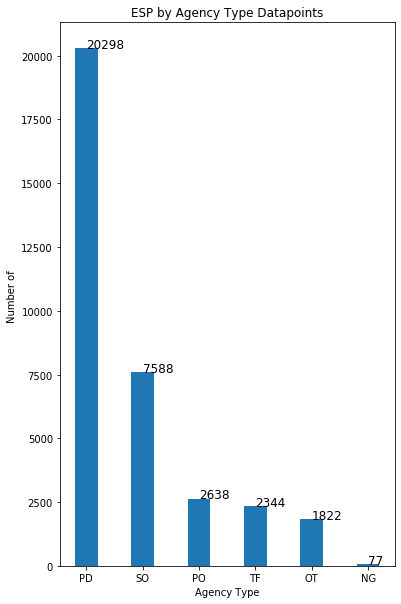

In [20]:
# Create a bar graph of the number of entries (CertificiationID submissions) by agency type
x = esp.AGENCYTYPE.value_counts().sort_values(ascending=False).index
y = list(esp.AGENCYTYPE.value_counts())
fig, ax = plt.subplots(figsize=(6,10))
ax.bar(x, y, width=0.4)
for index,data in enumerate(y):
    plt.text(x=index, y=data+1, s=f"{data}", fontdict=dict(fontsize=12))
plt.title("ESP by Agency Type Datapoints")
plt.xlabel("Agency Type")
plt.ylabel("Number of ")
plt.show()

In the Agency Type category, there are six different options. The entries in the dataset, marked each by a unique NCIC identifer, are associated with particular agencies that fall within the following categories:
- NG = National Guard Counterdrug Unit
- OT = Other
- PD = Police Department, 
- PO = Prosecutor's Office
- SO = Sheriff's Office
- TF = Task Force

In [21]:
# Organize the submission of ESF Certification Forms by Year
esp_submissions = esp["YEAR"].value_counts().sort_index()
print(esp_submissions)

2008     646
2009    1410
2010    6829
2011    7114
2012    7356
2013    7543
2014    3869
Name: YEAR, dtype: int64


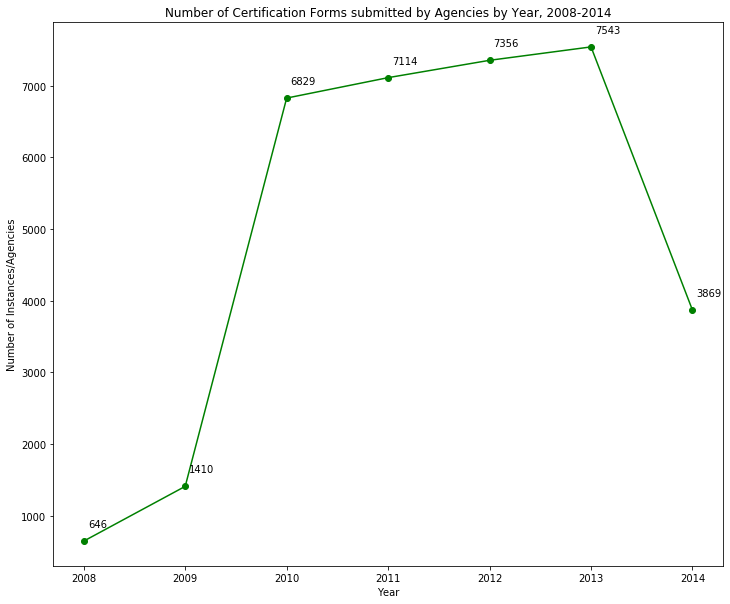

In [22]:
# Illustrate the number of certification forms by year in a line graph
esp_year = esp_submissions.index
esp_submissions

plt.figure(figsize=(12,10))
plt.plot(esp_year, esp_submissions[esp_submissions.index == esp_year], '-og' )
for x, y in zip(esp_year, esp_submissions):
    label = "{:}".format(y)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(4,14), ha='left')
plt.xlabel("Year")
plt.ylabel("Number of Instances/Agencies")
plt.title("Number of Certification Forms submitted by Agencies by Year, 2008-2014")
plt.show()

In [23]:
# Summary descriptive statistics of Total ESF, Justice by Year
print("Descriptive Statistics of Total ESF, Justice by Year")
esp.groupby(["YEAR"])["TOTAL ESF, JUSTICE"].describe()

Descriptive Statistics of Total ESF, Justice by Year


,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2008,646.0,244093.411765,1.759609e+06,0.0,695.0,14863.5,84374.00,40169952.0
2009,1410.0,233242.508511,1.495145e+06,0.0,0.0,9509.0,70867.00,46116717.0
2010,6829.0,204330.546786,1.015508e+06,0.0,0.0,10747.0,91210.00,50308560.0
2011,7114.0,210358.916222,1.024065e+06,0.0,0.0,9997.5,88826.25,47264136.0
2012,7356.0,210456.988037,9.953634e+05,0.0,0.0,9566.0,87244.00,43000129.0
2013,7543.0,209622.386584,1.085055e+06,0.0,0.0,9246.0,80760.50,51301033.0
2014,3869.0,306568.244766,3.337877e+06,0.0,0.0,12315.0,103234.00,192666934.0


In [24]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34767 entries, 2 to 45838
Data columns (total 24 columns):
AGENCYTYPE                            34767 non-null object
AGENCYNAME                            34767 non-null object
NCIC                                  34767 non-null object
STATE                                 34767 non-null object
FYENDDATE                             34767 non-null datetime64[ns]
CURRENTFYBUDGET                       34767 non-null float64
PARTICIPANT                           34767 non-null object
TOTAL ESF, JUSTICE                    34767 non-null float64
TOTAL ESF, TREASURY                   34767 non-null float64
FED SHARING FUNDS SPENT, JUSTICE      34767 non-null float64
FED SHARING FUNDS SPENT, TREASURY     34767 non-null float64
ENDING BALANCE, JUSTICE               34767 non-null float64
ENDING BALANCE, TREASURY              34767 non-null float64
TOTAL JUSTICE FUNDS SPENT/TRANSFER    34767 non-null int64
NONCASHASSETS                        

In [25]:
print("Top 15 Agencies that Submitted Certification Forms")
esp["AGENCYNAME"].value_counts().sort_values(ascending=False).head(15)

Top 15 Agencies that Submitted Certification Forms


Washington County Sheriff's Office    60
Franklin County Sheriff's Office      54
Jefferson County Sheriff's Office     51
Jackson County Sheriff's Office       45
Springfield Police Department         39
Lebanon Police Department             38
Greene County Sheriff's Office        35
Madison County Sheriff's Office       33
Canton Police Department              33
Newport Police Department             32
Milford Police Department             31
Franklin Police Department            30
Fairfield Police Department           30
Marion Police Department              30
Union County Sheriff's Office         30
Name: AGENCYNAME, dtype: int64

In [26]:
print("Top 15 States with the Highest Number of Certification Forms submitted by Agencies")
esp["STATE"].value_counts().sort_values(ascending=False).head(15)

Top 15 States with the Highest Number of Certification Forms submitted by Agencies


TX    2582
CA    2322
IL    1630
NY    1613
OH    1587
GA    1525
NC    1480
VA    1371
FL    1302
PA    1020
MA     980
NJ     980
WI     951
KY     938
MO     907
Name: STATE, dtype: int64

In [27]:
# Number of Instances wherein Agencies did/did not recieve Non-cash Assets
esp["NONCASHASSETS"].value_counts().sort_values(ascending=False)

N    32911
Y     1856
Name: NONCASHASSETS, dtype: int64

In [28]:
# Create sub-dataset for Instances wherein Agencies recieved Non-cash Assets
esp_nca = esp[esp["NONCASHASSETS"] == 'Y']

# Identify States that recieved the highest number of agencies who recieved Non-cash Assets
print("Top 15 States with Highest Number of Instances wherein an Agency recieved Non-cash Assets")
esp_nca.STATE.value_counts().sort_values(ascending=False).head(15)

Top 15 States with Highest Number of Instances wherein an Agency recieved Non-cash Assets


TX    209
NC    134
CA    119
NY    115
GA    107
MA     95
FL     86
IL     80
OH     60
CT     56
KY     56
IN     53
VA     46
MO     43
AL     39
Name: STATE, dtype: int64

In [29]:
esp_nca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 73 to 45765
Data columns (total 24 columns):
AGENCYTYPE                            1856 non-null object
AGENCYNAME                            1856 non-null object
NCIC                                  1856 non-null object
STATE                                 1856 non-null object
FYENDDATE                             1856 non-null datetime64[ns]
CURRENTFYBUDGET                       1856 non-null float64
PARTICIPANT                           1856 non-null object
TOTAL ESF, JUSTICE                    1856 non-null float64
TOTAL ESF, TREASURY                   1856 non-null float64
FED SHARING FUNDS SPENT, JUSTICE      1856 non-null float64
FED SHARING FUNDS SPENT, TREASURY     1856 non-null float64
ENDING BALANCE, JUSTICE               1856 non-null float64
ENDING BALANCE, TREASURY              1856 non-null float64
TOTAL JUSTICE FUNDS SPENT/TRANSFER    1856 non-null int64
NONCASHASSETS                         1856 non-null

In [30]:
nca_count = esp_nca.YEAR.value_counts().sort_index()
print(nca_count)

2008     31
2009     55
2010    425
2011    388
2012    427
2013    339
2014    191
Name: YEAR, dtype: int64


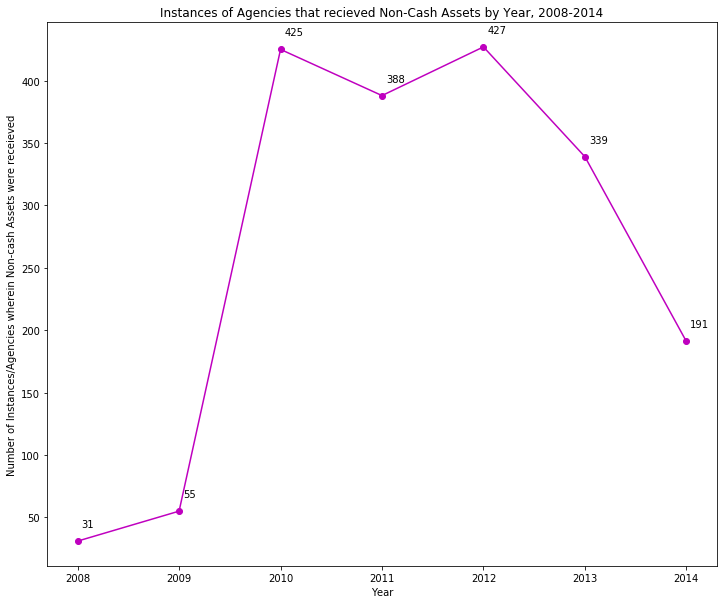

In [31]:
# Illustrate the instances of agencies recieving Non-Cash Assets by Year
nca_year = nca_count.index
nca_count
plt.figure(figsize=(12,10))
plt.plot(nca_year, nca_count[nca_count.index == nca_year], '-om' )
for x, y in zip(nca_year, nca_count):
    label = "{:}".format(y)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(4,14), ha='left')
plt.xlabel("Year")
plt.ylabel("Number of Instances/Agencies wherein Non-cash Assets were receieved")
plt.title("Instances of Agencies that recieved Non-Cash Assets by Year, 2008-2014")
plt.show()

In [32]:
# Whether agency had been part of any legal proceeding alleging discrimination in the previous fiscl year
disc_esp = esp.DISCRIM.value_counts()
print(disc_esp)

N    33591
Y     1176
Name: DISCRIM, dtype: int64


In [33]:
# Whether agency who recieved Non-Cash Assets had been part of any legal proceeding alleging discrimination in the previous fiscal year
disc_nca = esp_nca.DISCRIM.value_counts()
print(disc_nca)

N    1658
Y     198
Name: DISCRIM, dtype: int64


In [34]:
# Cross tabulation of Agency Type and Discrimination Allegation
print("Heatmap of Agency Type and Discrimination Allegation")
Xtab = pd.crosstab(esp_nca.AGENCYTYPE, esp_nca.DISCRIM)
Xtab.style.background_gradient(cmap="Blues")

Heatmap of Agency Type and Discrimination Allegation


DISCRIM,N,Y
AGENCYTYPE,,
NG,1,0
OT,67,27
PD,990,122
PO,42,0
SO,410,47
TF,148,2


In [35]:
# Top 15 states with instances wherein an Agency had a previous allegation of discrimination
esp_disc = esp[esp['DISCRIM'] == 'Y']
esp_disc.STATE.value_counts().sort_values(ascending=False).head(15)

CA    127
FL     93
NY     77
TX     64
OH     54
MA     45
MI     44
IL     43
PA     43
NJ     40
GA     37
CO     35
TN     33
CT     30
AL     26
Name: STATE, dtype: int64

In [36]:
# Agencies with the highest number of instances wherein there was a previous allegation of discrimination
esp_disc.AGENCYNAME.value_counts().sort_values(ascending=False).head(15)

Los Angeles County Sheriff Department                 7
California Department Of Corrections And Rehabilit    7
Houston Police Department                             7
Memphis Police Department                             6
North Carolina Division Of Motor Vehicles             6
Alabama Department Of Public Safety                   6
Baltimore Police Department                           6
Portland Police Bureau                                6
South Carolina Department Of Public Safety            6
Los Angeles Police Department                         5
Bay County Sheriffs Office                            5
Baltimore County Police Department                    5
Lowell Police Department                              5
Las Vegas Metropolitan Police Department              5
Philadelphia Police Department                        5
Name: AGENCYNAME, dtype: int64

In [37]:
# Create sub-dataset of instances where Agencies had recieved Non-Cash Assets and a previous allegation of Discrimination
nca_disc = esp_nca[esp_nca["DISCRIM"] == "Y"]
nca_disc.head(5)

,AGENCYTYPE,AGENCYNAME,NCIC,STATE,FYENDDATE,CURRENTFYBUDGET,PARTICIPANT,"TOTAL ESF, JUSTICE","TOTAL ESF, TREASURY","FED SHARING FUNDS SPENT, JUSTICE",...,NONCASHASSETS,DISCRIM,LAWENFHEADNAME,LAWENFHEADTITLE,GOVBODYHEADNAME,GOVBODYHEADTITLE,VERSION,CERTIFICATIONID,YEAR,MONTH
759,OT,Alabama Department Of Public Safety,ALAST0044,AL,2010-09-30,165601459.0,EXIST,7668980.0,1597120.0,1815082.0,...,Y,Y,F. A. Bingham,Acting Director,Bob Riley,Governor,1.8,120699,2010,9
760,OT,Alabama Department Of Public Safety,ALAST0044,AL,2009-09-30,173810187.0,AMEND,6649768.0,1597120.0,1580212.0,...,Y,Y,F.A. BINGHAM,ACTING DIRECTOR,BOB RILEY,GOVERNOR,1.8,109604,2009,9
761,OT,Alabama Department Of Public Safety,ALAST0044,AL,2013-09-30,164929810.0,EXIST,4363272.0,2600615.0,3090459.0,...,Y,Y,Hugh B. McCall,Director,Robert Bentley,Governor,2.1,152511,2013,9
762,OT,Alabama Department Of Public Safety,ALAST0044,AL,2012-09-30,168682349.0,AMEND,5421792.0,2600615.0,1829254.0,...,Y,Y,Hugh B. McCall,Director,Robert Bentley,Governor,2.1,141758,2012,9
763,OT,Alabama Department Of Public Safety,ALAST0044,AL,2008-09-30,183137019.0,AMEND,3503845.0,1597120.0,1148163.0,...,Y,Y,F.A. BINGHAM,ACTING DIRECTOR,BOB RILEY,GOVERNOR,1.8,99416,2008,9


In [38]:
#Instances/Agencies that recieved Non-cash Assets and Discrimination Allegation, by Year
nca_disc.YEAR.value_counts().sort_index()

2008     6
2009    10
2010    57
2011    33
2012    44
2013    32
2014    16
Name: YEAR, dtype: int64

In [39]:
#Top Ten States ofInstances/Agencies that recieved Non-cash Assets and Discrimination Allegation
nca_disc.STATE.value_counts().sort_values(ascending=False).head(10)

TX    18
FL    18
MA    14
NY    14
AL    11
CA    11
CT    10
IL     9
GA     7
OH     7
Name: STATE, dtype: int64

In [40]:
list(nca_disc.AGENCYNAME.unique())

['Alabama Department Of Public Safety',
 'Anaheim Police Department',
 'Arkansas State Police',
 'Aurora Police Department',
 'Austin Police Department',
 "Baldwin County Sheriff's Office",
 'Bay County Sheriffs Office',
 "Bernalillo County Sheriff's Department",
 'Boston Police Department',
 'Braselton Police Department',
 'Bridgeport Police Department',
 'Brockton Police Department',
 "Broward Sheriff's Office",
 'Buffalo Police Department',
 'CT Dept. of Emergency Svcs and Public Protection/Public Safety',
 'Cambridge, Ma Police Department,',
 'Camden City Police Department',
 'Charlotte Mecklenburg  Police Department',
 'Chelsea Police Department',
 'Chicago Police Department',
 'City Of Dallas Police Department',
 'City Of Douglasville Police Department',
 'City Of Hackensack Police Department',
 'City Of Montgomery Police Department',
 'City Of Oakland Police Department',
 'City Of Redding Police Department',
 'City Of Saint Paul Police Department',
 'City Of San Antonio Police D

In [41]:
# Summary descriptive statistics of Total ESF, Justice by Year, Agencies with Discrimination Allegation and Non-Cash Assets Recieved
print("NCA and Discrimination Agencies: Descriptive Statistics of Total ESF, Justice by Year")
nca_disc.groupby(["YEAR"])["TOTAL ESF, JUSTICE"].describe()

NCA and Discrimination Agencies: Descriptive Statistics of Total ESF, Justice by Year


,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2008,6.0,1.306440e+06,1.245885e+06,358852.0,515372.50,715962.0,1750623.50,3503845.0
2009,10.0,2.305719e+06,2.221350e+06,0.0,555998.50,1756001.0,3695880.50,6649768.0
2010,57.0,1.932611e+06,2.835657e+06,3870.0,415240.00,822498.0,1752052.00,11858092.0
2011,33.0,2.430067e+06,3.600988e+06,12952.0,291360.00,883280.0,2488097.00,13271860.0
2012,44.0,1.857286e+06,4.032150e+06,0.0,264437.00,625555.5,1094043.75,21147613.0
2013,32.0,1.870376e+06,2.336839e+06,30054.0,405896.25,843914.0,2185540.75,9768067.0
2014,16.0,2.097507e+06,2.610718e+06,37229.0,397531.25,992876.5,3452928.25,10088030.0
